# Topo map comparison

Compare IGN, SwissTopo, Kompass, Bugianen, and various OSM maps,accross the alps

So far I limit to zoom 10. What we can see below is:

* z9: swiss "dz" is better
    + cleaner mountains
    + less data but less clutetr
    - covers only Barcelonnette (S) / Udine&Salzburg (E)
    + (anyway IGN covers only east to Lago Maggiore)
    + IGN is ok only in France
    + OpenTopoMap is meh


* z8 OTM:
    + OpenTopoMap has good physical map (even if too dark)
    + IGN much too big
    + SwissTopo no data

* z7: 
    - OTM: same
    - IGN: same dezoomed, colored countries

* z6: none really satisfactory but OpenTopoMap is consistent.

# --> Decision

* z9: SwissTopo, backup IGN
* z6-8: OpenTopoMap



In [ ]:
%load_ext autoreload
%autoreload 2

import os
from os.path import realpath
NBROOT = realpath(os.curdir)

import logging
logging.basicConfig(level=logging.DEBUG)

import sys
sys.path.append(realpath('..'))
sys.path.append(realpath('../../eslope/development/src'))

In [18]:
# Preamble

logging.getLogger('PIL').level = logging.INFO # PIL.PngImagePlugin

import os
from os.path import exists, join as pjoin, expanduser
import sqlite3
from pathlib import Path
from time import time
from urllib.error import HTTPError
from urllib.request import urlopen, urlretrieve

#external
from IPython.display import display, Image
from PIL import Image as Img
import mercantile as T

import mbt_util as M
import bbox as BB
from src import img_util as G, mbt_pyramid as MP
from src.swisstopo import ch_url, geturl_ch_downsampled

In [ ]:
dir = pjoin(NBROOT, '../data/sample_topo')
os.makedirs(dir, exist_ok=True)
%cd $dir

In [ ]:
os.makedirs('tiles', exist_ok=True)

In [ ]:
ZOOMS=range(6,11+1)

In [38]:
from random import randint

def ignweburl(z, x, y):
    # for top25 zoomed out: =GEOGRAPHICALGRIDSYSTEMS.MAPS.SCAN25TOUR
    return ( 'https://wxs.ign.fr/8jdgffs9i650h6hukfxdip4v/geoportail/wmts?'
             'Layer=GEOGRAPHICALGRIDSYSTEMS.MAPS&Style=normal&TileMatrixSet=PM&SERVICE=WMTS&'
            f'REQUEST=GetTile&VERSION=1.0.0&FORMAT=image/jpeg&TileMatrix={z}&TileCol={x}&TileRow={y}')


datasets = {
    'bugianen':   expanduser('~/Downloads/dwnmaps/mapdata/mbtiles/Bugianen/Bugianen.mbtiles'),
    'kompass':    expanduser('~/Downloads/dwnmaps/mapsoft/MOBAC-2.1.4/atlases/Kompass_dolo.mbtiles'),
    'chdzsw':     '../sample_ch/chsw.mbtiles',
    'chdzsc':     '../sample_ch/chsc.mbtiles',
    'chdzse':     '../sample_ch/chse.mbtiles',
    'chdzc':      '../sample_ch/chc.mbtiles',
    'chdzweb':    geturl_ch_downsampled,
    'chweb':      ch_url('pixelkarte-farbe', 'jpeg'),
    'cyclosm':    lambda z, x, y: f'https://c.tile-cyclosm.openstreetmap.fr/cyclosm/{z}/{x}/{y}.png',
    'kompassweb': lambda z, x, y: f'http://ec{randint(0, 3)}.cdn.ecmaps.de/WmsGateway.ashx.jpg?Experience=ecmaps&MapStyle=KOMPASS%20Touristik&TileX={x}&TileY={y}&ZoomLevel={z}',
    'ignweb':     ignweburl,
    'osm':        lambda z, x, y: f'https://{chr(ord("a")+randint(0,2))}.tile.openstreetmap.org/{z}/{x}/{y}.png',
    'ocm':        lambda z, x, y: (f'https://{chr(ord("a")+randint(0,2))}.tile.opencyclemap.org/cycle/{z}/{x}/{y}.png', 'http://www.openstreetmap.org/'),
    'mri':        lambda z, x, y: f'https://maps.refuges.info/hiking/{z}/{x}/{y}.png',
    'otm':        lambda z, x, y: f'https://{chr(ord("a")+randint(0,2))}.tile.opentopomap.org/{z}/{x}/{y}.png',
    '4umaps':     lambda z, x, y: f'https://tileserver.4umaps.com/{z}/{x}/{y}.png',
}

def makepy(dname, llname, zooms=range(9, 16+1)):
    ll = getattr(BB, 'll'+llname)  # eg BB.lldolo
    src = datasets[dname]
    makepyfun = MP.tile_pyramid if isinstance(src, str) else G.tile_pyramid_url
    makepyfun(f'{llname}_{dname}.jpeg', ll, src, zooms)
    return Image(filename=f'{llname}_{dname}.jpeg')


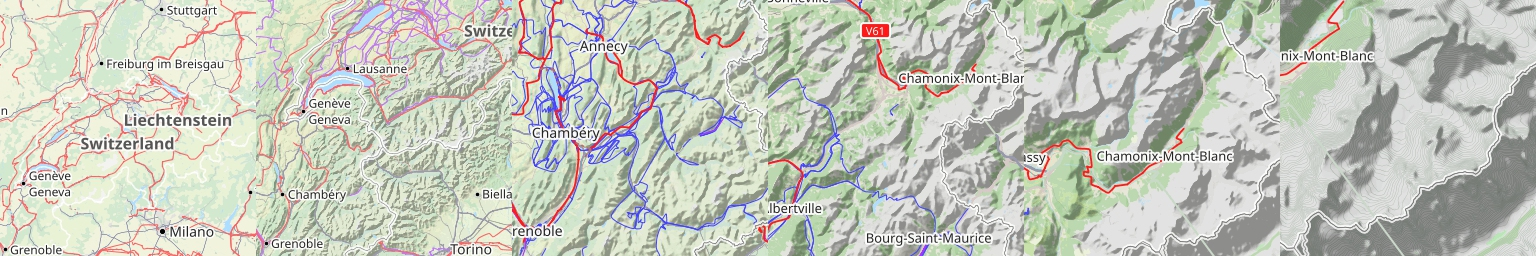

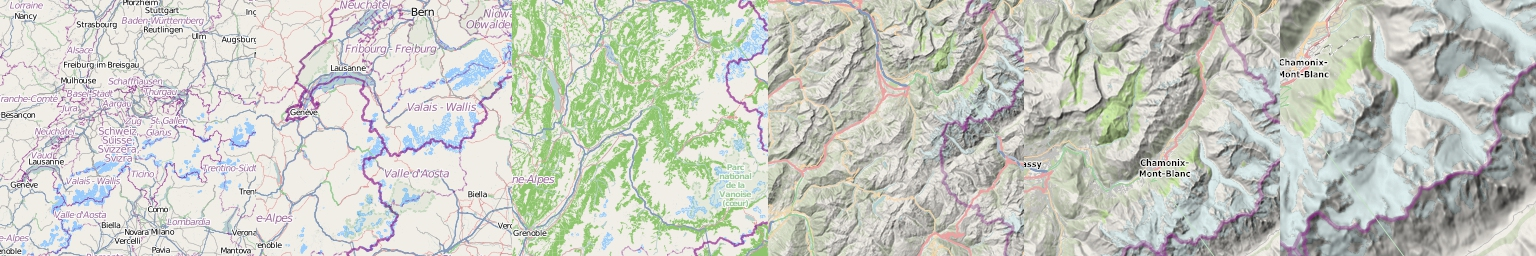

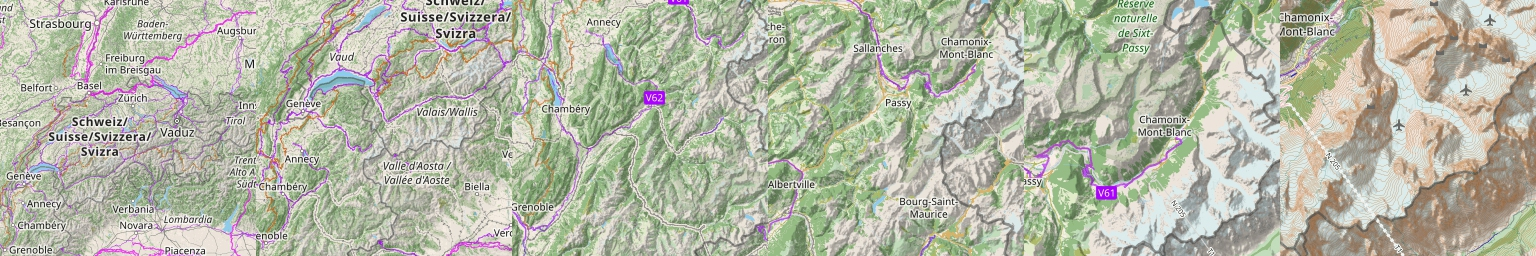

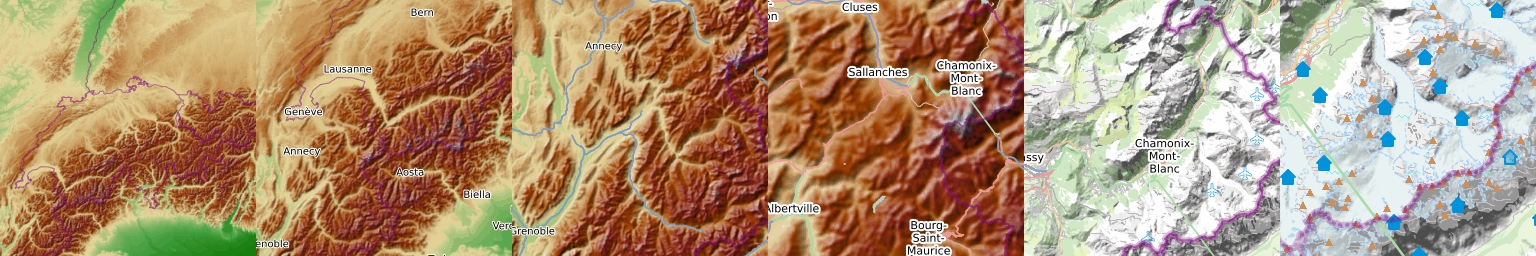

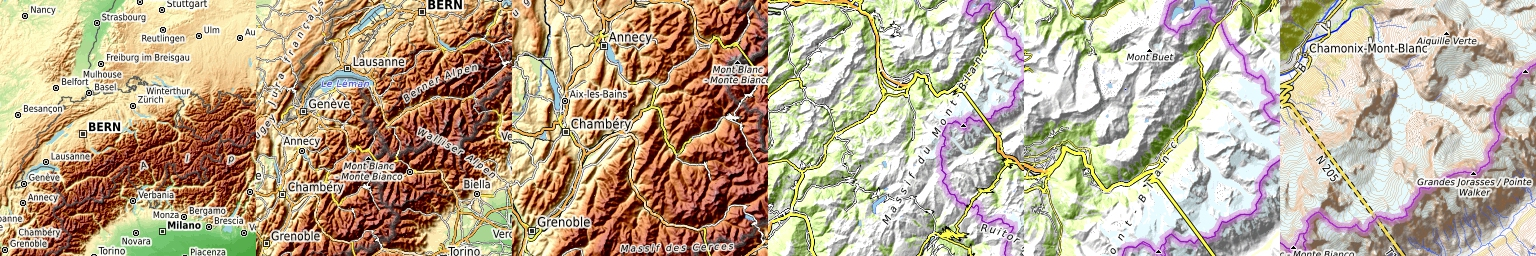

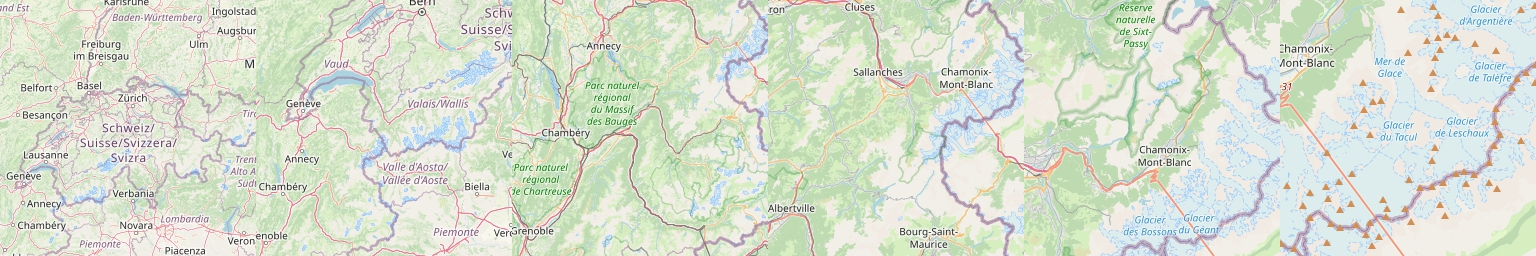

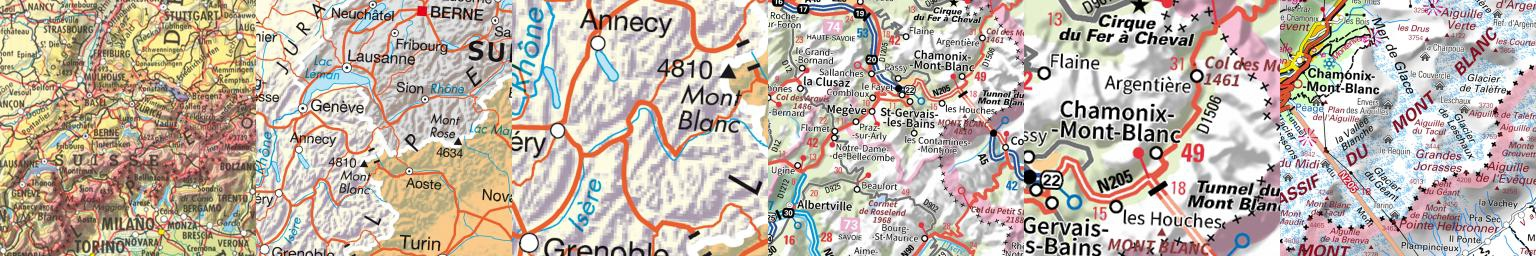

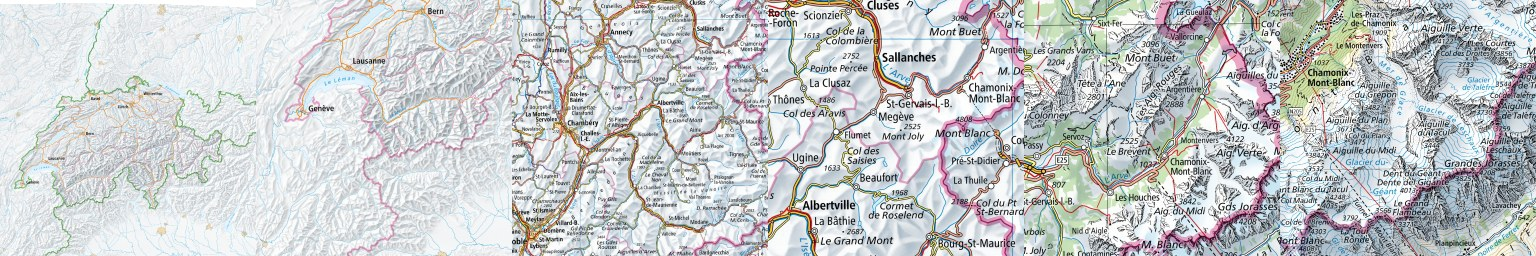

In [39]:
for dname in 'ocm', '4umaps', 'cyclosm', 'mri', 'otm', 'osm', 'ignweb', 'chdzweb':
    display(makepy(dname, 'midi', ZOOMS))

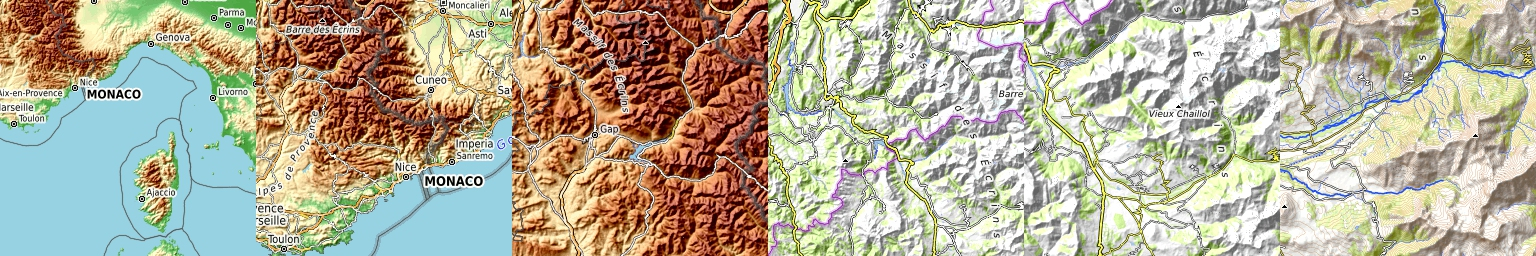

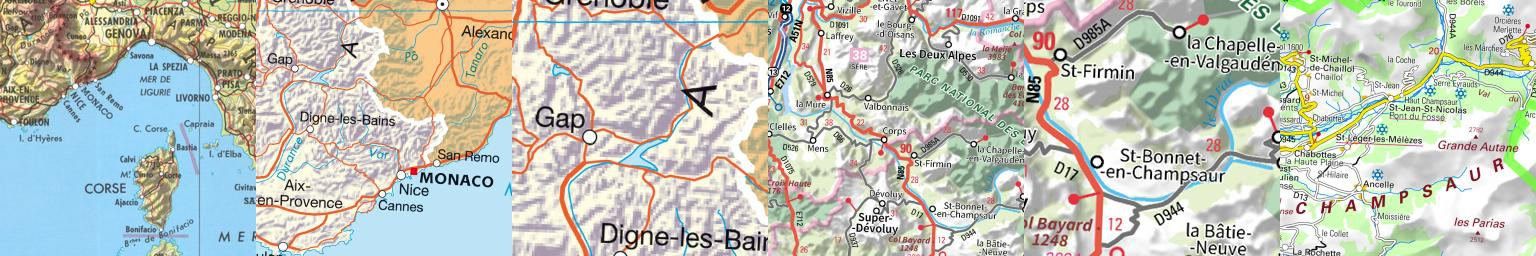

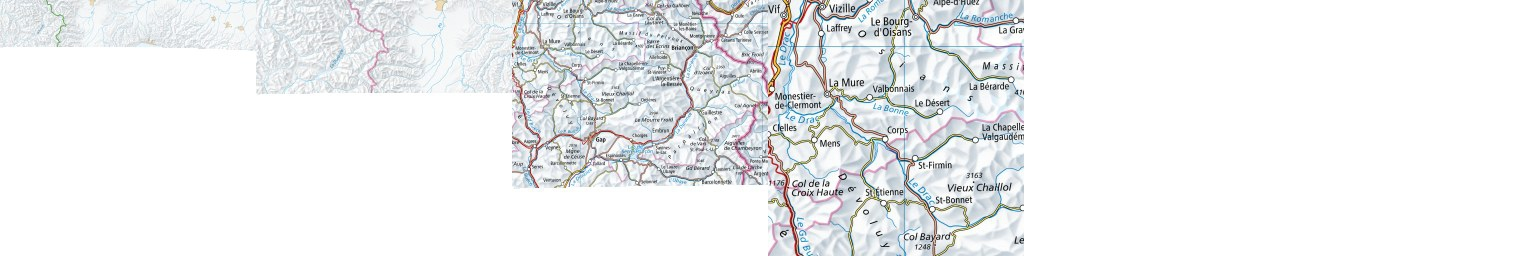

In [41]:
for dname in 'otm', 'ignweb', 'chdzweb':
    display(makepy(dname, 'orcieres', zooms=ZOOMS))

In [ ]:
for dname in 'otm', 'ignweb', 'chdzweb':
    display(makepy(dname, 'tignes', zooms=ra))

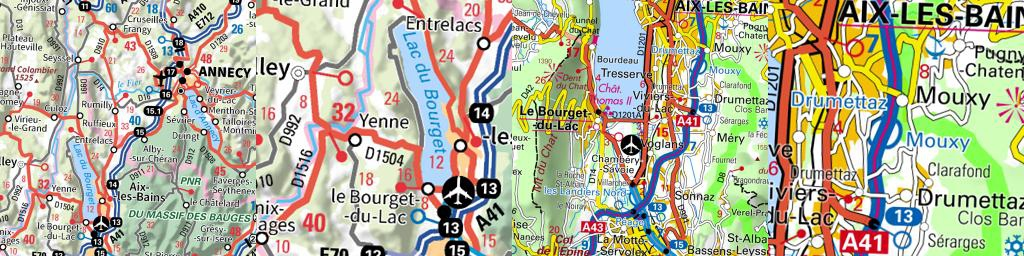

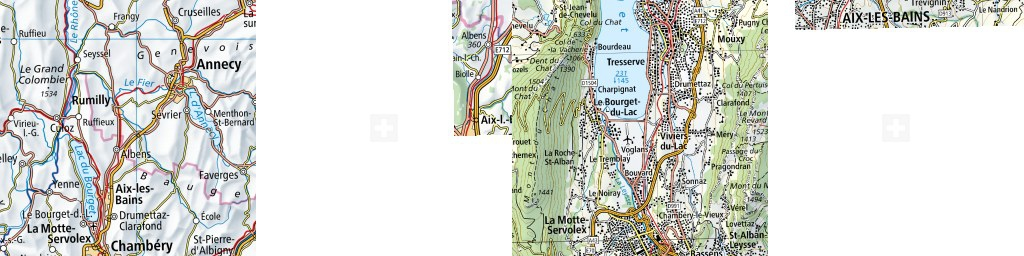

In [51]:
# This is SwissTopo z10,12 SW corner -- the one going through aoste, that I used so far
for dname in 'ignweb', 'chdzweb':
    display(makepy(dname, 'aixbains', zooms=range(9,12+1)))

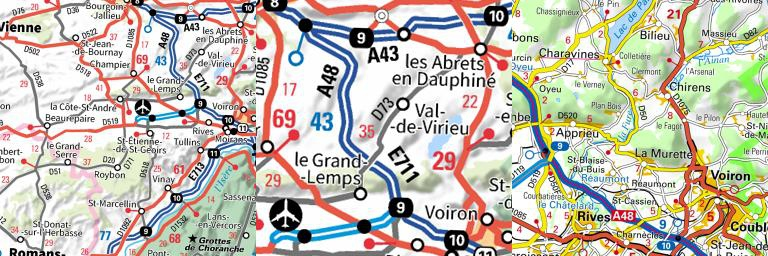

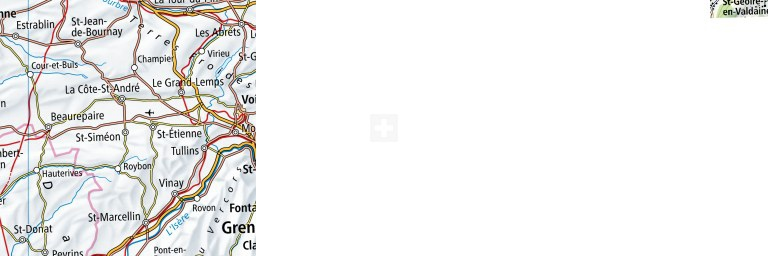

In [52]:
# This is SwissTopo z11 SW corner, that actually goes further south than z10 .....
for dname in 'ignweb', 'chdzweb':
    display(makepy(dname, 'stgeoire', zooms=range(9,11+1)))

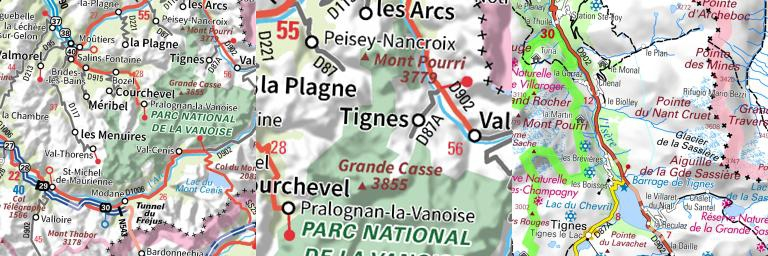

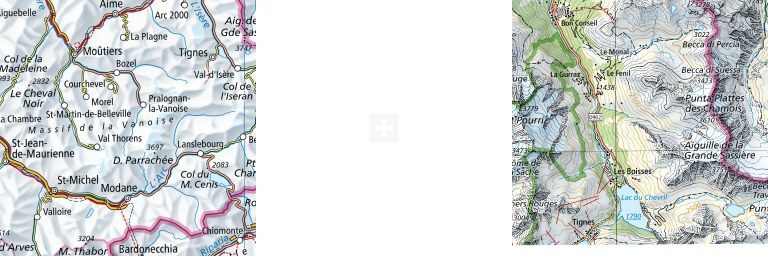

In [48]:
# Further east on same z11 line
for dname in 'ignweb', 'chdzweb':
    display(makepy(dname, 'tignes', zooms=range(9,11+1)))